In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from analysis_functions import Analysis

# 1) Initial Analysis

In [15]:
uqc_1qubit_path = "../../results/poster/uqc_optuna_best_hyper"
uqc_2qubit_path = "../../results/poster/2qubits_3layers_full"
uqc_4qubit_path = "../../results/poster/4qubits_5layers_full"
baseline_path = "../../results/continuous/skolik_arch/baseline/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper_mse"
skolik_path= "../../results/continuous/skolik_arch/schuld_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper_mse"

In [16]:
uqc_1qubit_analysis = Analysis(uqc_1qubit_path)
uqc_2qubit_analysis = Analysis(uqc_2qubit_path)
uqc_4qubit_analysis = Analysis(uqc_4qubit_path)
skolik_analysis = Analysis(skolik_path)
baseline_analysis = Analysis(baseline_path)

In [17]:
uqc_1_qubit_moving_average = uqc_1qubit_analysis.get_moving_average(25)
uqc_1_qubit_moving_average = [sublist for sublist in uqc_1_qubit_moving_average if len(sublist)!=200]
uqc_2_qubit_moving_average = uqc_2qubit_analysis.get_moving_average(25)
uqc_4_qubit_moving_average = uqc_4qubit_analysis.get_moving_average(25)
skolik_moving_average = skolik_analysis.get_moving_average(25)
baseline_moving_average = baseline_analysis.get_moving_average(25)

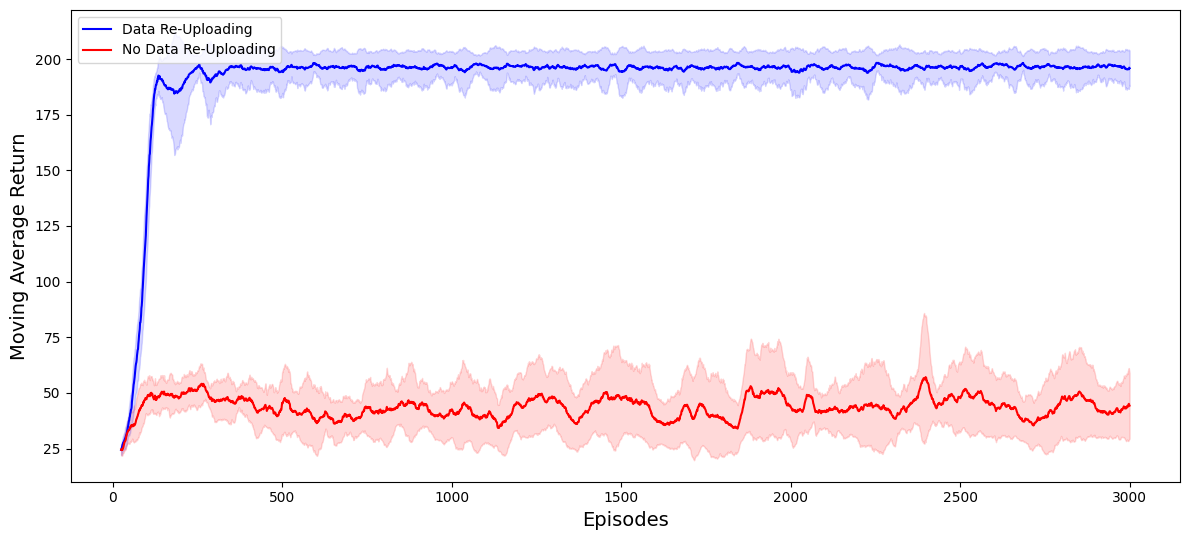

In [22]:
means_skolik = np.mean(skolik_moving_average, axis=0)
stds_skolik = np.std(skolik_moving_average, axis=0)
means_baseline = np.mean(baseline_moving_average, axis=0)
stds_baseline = np.std(baseline_moving_average, axis=0)

fig, axs = plt.subplots(1, 1, tight_layout = True, figsize=(12, 5.5), sharey = True)
axs.plot(means_skolik, color='blue', linewidth=1.5, label='Data Re-Uploading')
axs.plot(means_baseline, color='red', linewidth=1.5, label='No Data Re-Uploading')

axs.fill_between(range(len(means_skolik)), means_skolik-stds_skolik, means_skolik+stds_skolik, color='blue', alpha=0.15)
axs.fill_between(range(len(means_baseline)), means_baseline-stds_baseline, means_baseline+stds_baseline, color='red', alpha=0.15)

axs.set_xlabel('Episodes', fontsize=14)
axs.set_ylabel('Moving Average Return', fontsize=14)
axs.legend()

plt.show()


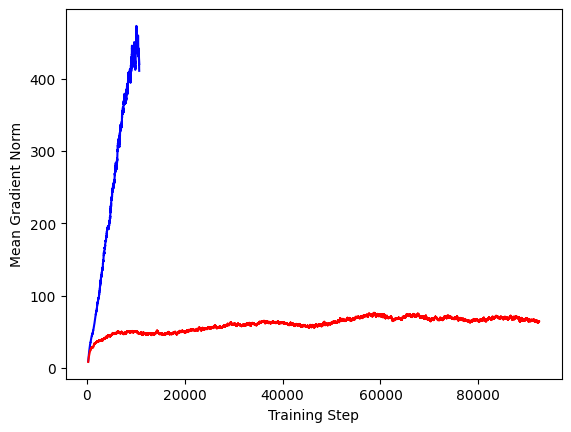

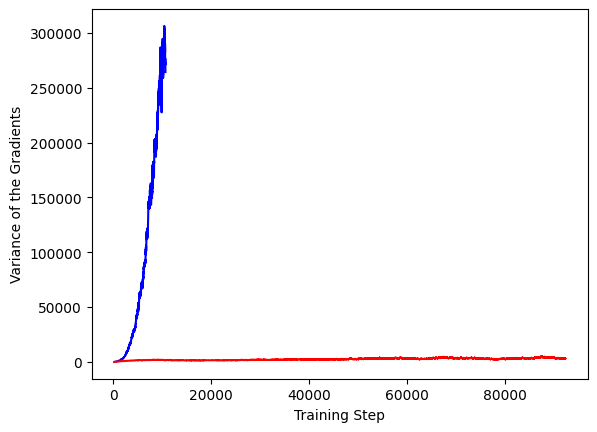

In [21]:
mean_gradients_skolik, variance_gradients_skolik = skolik_analysis.get_gradients_all_params()
mean_gradients_baseline, variance_gradients_baseline = baseline_analysis.get_gradients_all_params()

mean_gradients_skolik_smoothed = pd.Series(mean_gradients_skolik).rolling(250).mean()
mean_gradients_baseline_smoothed = pd.Series(mean_gradients_baseline).rolling(250).mean()
variance_gradients_skolik_smoothed = pd.Series(variance_gradients_skolik).rolling(250).mean()
variance_gradients_baseline_smoothed = pd.Series(variance_gradients_baseline).rolling(250).mean()


plt.plot(mean_gradients_skolik_smoothed, color='blue', linewidth=1.5, label='Data Re-Uploading')
plt.plot(mean_gradients_baseline_smoothed, color='red', linewidth=1.5, label='No Data Re-Uploading')
plt.xlabel("Training Step")
plt.ylabel("Mean Gradient Norm")
plt.show()

plt.plot(variance_gradients_skolik_smoothed, color='blue', linewidth=1.5, label='Data Re-Uploading')
plt.plot(variance_gradients_baseline_smoothed, color='red', linewidth=1.5, label='No Data Re-Uploading')
plt.xlabel("Training Step")
plt.ylabel("Variance of the Gradients")
plt.show()


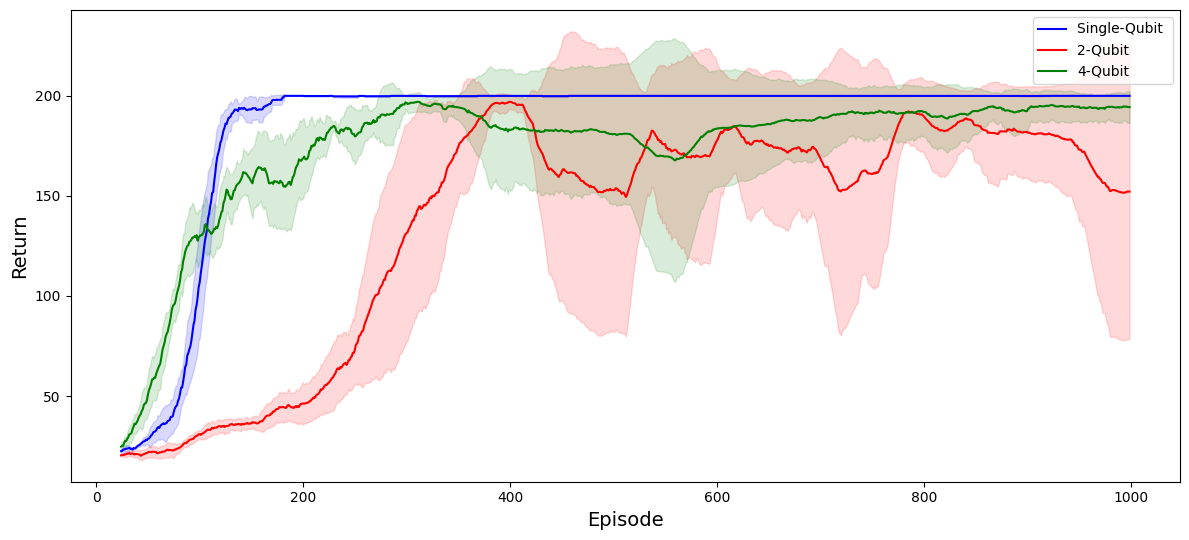

In [24]:
# calculate the mean and standard deviation of the moving averages for each agent
means_single_qubit = np.mean(uqc_1_qubit_moving_average, axis=0)
stds_single_qubit = np.std(uqc_1_qubit_moving_average, axis=0)
means_2qubits = np.mean(uqc_2_qubit_moving_average, axis=0)
stds_2qubits = np.std(uqc_2_qubit_moving_average, axis=0)
means_4qubits = np.mean(uqc_4_qubit_moving_average, axis=0)
stds_4qubits = np.std(uqc_4_qubit_moving_average, axis=0)



# plot the mean of the moving averages for each agent with different colors
fig, axs = plt.subplots(1, 1, tight_layout = True, figsize=(12, 5.5), sharey = True)
axs.plot(means_single_qubit, color='blue', linewidth=1.5, label='Single-Qubit ')
axs.plot(means_2qubits, color='red', linewidth=1.5, label='2-Qubit')
axs.plot(means_4qubits, color='green', linewidth=1.5, label='4-Qubit')


# add shaded regions for the standard deviation of the moving averages
axs.fill_between(range(len(means_single_qubit)), means_single_qubit-stds_single_qubit, means_single_qubit+stds_single_qubit, color='blue', alpha=0.15)
axs.fill_between(range(len(means_2qubits)), means_2qubits-stds_2qubits, means_2qubits+stds_2qubits, color='red', alpha=0.15)
axs.fill_between(range(len(means_4qubits)), means_4qubits-stds_4qubits, means_4qubits+stds_4qubits, color='green', alpha=0.15)

# add labels and title
axs.set_xlabel('Episode', fontsize=14)
axs.set_ylabel('Return', fontsize=14)
axs.legend()

# show the plot
plt.show()

In [25]:
mean_gradients_single_qubit, variance_gradients_single_qubit = uqc_1qubit_analysis.get_gradients_all_params()
mean_gradients_2qubits, variance_gradients_2qubits = uqc_2qubit_analysis.get_gradients_all_params()
mean_gradients_4qubits, variance_gradients_4qubits = uqc_4qubit_analysis.get_gradients_all_params()

In [26]:
# Let's calculate a moving average of the gradients every 200 steps
mean_gradients_single_qubit_smoothed = pd.Series(mean_gradients_single_qubit).rolling(250).mean()
mean_gradients_2qubits_smoothed = pd.Series(mean_gradients_2qubits).rolling(250).mean()
mean_gradients_4qubits_smoothed = pd.Series(mean_gradients_4qubits).rolling(250).mean()
variance_gradients_single_qubit_smoothed = pd.Series(variance_gradients_single_qubit).rolling(250).mean()
variance_gradients_2qubits_smoothed = pd.Series(variance_gradients_2qubits).rolling(250).mean()
variance_gradients_4qubits_smoothed = pd.Series(variance_gradients_4qubits).rolling(250).mean()

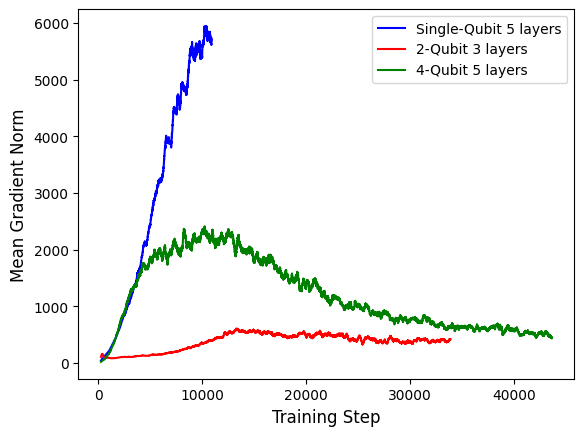

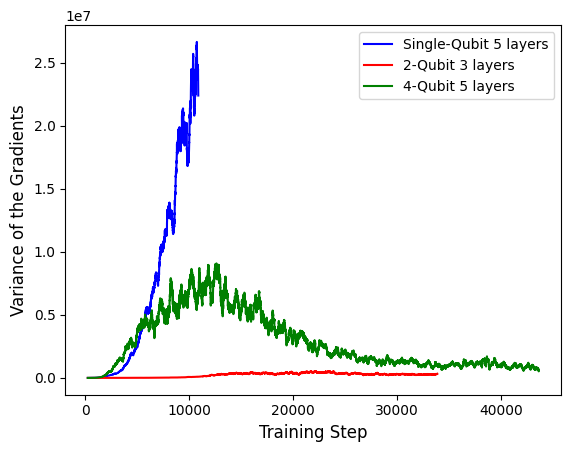

In [27]:
plt.plot(mean_gradients_single_qubit_smoothed, color='blue', linewidth=1.5, label='Single-Qubit 5 layers')
plt.plot(mean_gradients_2qubits_smoothed, color='red', linewidth=1.5, label='2-Qubit 3 layers')
plt.plot(mean_gradients_4qubits_smoothed, color='green', linewidth=1.5, label='4-Qubit 5 layers')
plt.xlabel('Training Step', fontsize=12)
plt.ylabel('Mean Gradient Norm', fontsize=12)
plt.legend()
plt.show()

plt.plot(variance_gradients_single_qubit_smoothed, color='blue', linewidth=1.5, label='Single-Qubit 5 layers')
plt.plot(variance_gradients_2qubits_smoothed, color='red', linewidth=1.5, label='2-Qubit 3 layers')
plt.plot(variance_gradients_4qubits_smoothed, color='green', linewidth=1.5, label='4-Qubit 5 layers')
plt.xlabel('Training Step', fontsize=12)
plt.ylabel('Variance of the Gradients', fontsize=12)
plt.legend()

In [52]:
def calculate_mean_return(results, number_of_episodes):
    results = [r[:number_of_episodes] for r in results]
    results_mean = np.mean(results, axis=0)
    return results_mean

In [53]:
def performance(results):
    performance = np.trapz(results)
    return performance

In [54]:
single_qubit_performance = performance(means_single_qubit[25:])
two_qubit_performance = performance(means_2qubits[25:])
four_qubit_performance = performance(means_4qubits[25:])
skolik_performance = performance(means_skolik[25:])

In [55]:
print("Single qubit performance: ", single_qubit_performance)
print("Two qubit performance: ", two_qubit_performance)
print("Four qubit performance: ", four_qubit_performance)
print("Skolik performance: ", skolik_performance)

Single qubit performance:  181436.47999999998
Two qubit performance:  134086.192
Four qubit performance:  170483.18
Skolik performance:  179633.064


In [56]:
single_qubit_parameters = uqc_1qubit_analysis.get_final_weights()[0]
two_qubit_parameters = uqc_2qubit_analysis.get_final_weights()[0]
four_qubit_parameters = uqc_4qubit_analysis.get_final_weights()[0]
skolik_parameters = skolik_analysis.get_final_weights()[0]

In [57]:
def get_size(arrays):
    size = 0
    for array in arrays:
        size += array.size
    return size

In [58]:
single_qubit_uqc_parameters_size = get_size(single_qubit_parameters)
two_qubit_uqc_parameters_size = get_size(two_qubit_parameters)
four_qubit_uqc_parameters_size = get_size(four_qubit_parameters)
skolik_uqc_parameters_size = get_size(skolik_parameters)


In [59]:
print("Single qubit parameters size: ", single_qubit_uqc_parameters_size)
print("Two qubit parameters size: ", two_qubit_uqc_parameters_size)
print("Four qubit parameters size: ", four_qubit_uqc_parameters_size)
print("Skolik parameters size: ", skolik_uqc_parameters_size)

Single qubit parameters size:  32
Two qubit parameters size:  37
Four qubit parameters size:  121
Skolik parameters size:  70


In [60]:
print("Units of Area Under Curve per Parameter for single qubit: ", single_qubit_performance/single_qubit_uqc_parameters_size)
print("Units of Area Under Curve per Parameter for two qubit: ", two_qubit_performance/two_qubit_uqc_parameters_size)
print("Units of Area Under Curve per Parameter for four qubit: ", four_qubit_performance/four_qubit_uqc_parameters_size)
print("Units of Area Under Curve per Parameter for skolik: ", skolik_performance/skolik_uqc_parameters_size)

Units of Area Under Curve per Parameter for single qubit:  5669.889999999999
Units of Area Under Curve per Parameter for two qubit:  3623.9511351351352
Units of Area Under Curve per Parameter for four qubit:  1408.9519008264463
Units of Area Under Curve per Parameter for skolik:  2566.1866285714286


# 2) Analysis of the Final Models without seed

In [1]:
uqc_1qubit_path = "../../results/poster/uqc_1qubit_final"
uqc_2qubit_path = "../../results/poster/uqc_2qubits_final"
uqc_4qubit_path = "../../results/poster/uqc_4qubits_final"
#baseline_path = "../../results/continuous/skolik_arch/baseline/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper_mse"
#skolik_path= "../../results/continuous/skolik_arch/schuld_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper_mse"
baseline_path = "../../results/poster/skolik_baseline_final"
schuld_path = "../../results/poster/skolik_schuld_final"

In [3]:
uqc_1qubit_analysis = Analysis(uqc_1qubit_path)
uqc_2qubit_analysis = Analysis(uqc_2qubit_path)
uqc_4qubit_analysis = Analysis(uqc_4qubit_path)
skolik_analysis = Analysis(schuld_path)
baseline_analysis = Analysis(baseline_path)

In [4]:
uqc_1_qubit_moving_average = uqc_1qubit_analysis.get_moving_average(25)
uqc_1_qubit_moving_average = [sublist for sublist in uqc_1_qubit_moving_average if len(sublist)!=200]
uqc_2_qubit_moving_average = uqc_2qubit_analysis.get_moving_average(25)
uqc_4_qubit_moving_average = uqc_4qubit_analysis.get_moving_average(25)
skolik_moving_average = skolik_analysis.get_moving_average(25)
baseline_moving_average = baseline_analysis.get_moving_average(25)

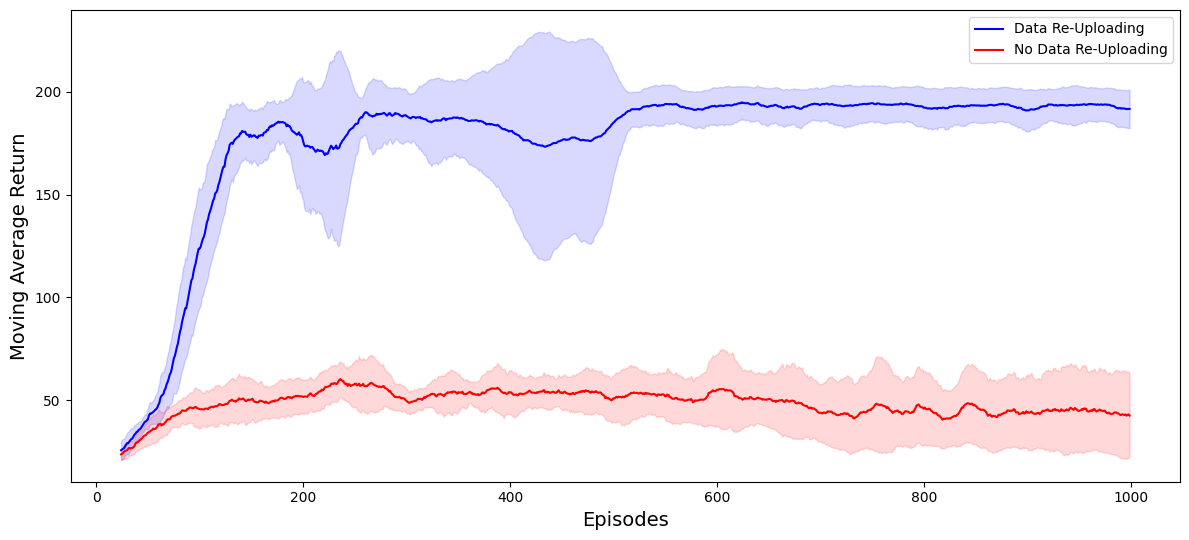

In [6]:
means_skolik = np.mean(skolik_moving_average, axis=0)
stds_skolik = np.std(skolik_moving_average, axis=0)
means_baseline = np.mean(baseline_moving_average, axis=0)
stds_baseline = np.std(baseline_moving_average, axis=0)

fig, axs = plt.subplots(1, 1, tight_layout = True, figsize=(12, 5.5), sharey = True)
axs.plot(means_skolik, color='blue', linewidth=1.5, label='Data Re-Uploading')
axs.plot(means_baseline, color='red', linewidth=1.5, label='No Data Re-Uploading')

axs.fill_between(range(len(means_skolik)), means_skolik-stds_skolik, means_skolik+stds_skolik, color='blue', alpha=0.15)
axs.fill_between(range(len(means_baseline)), means_baseline-stds_baseline, means_baseline+stds_baseline, color='red', alpha=0.15)

axs.set_xlabel('Episodes', fontsize=14)
axs.set_ylabel('Moving Average Return', fontsize=14)
axs.legend()

plt.show()


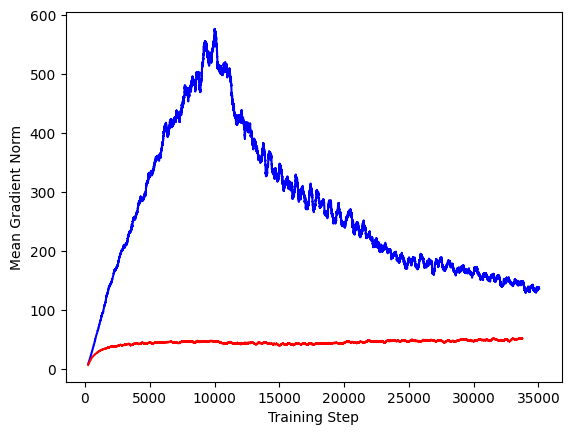

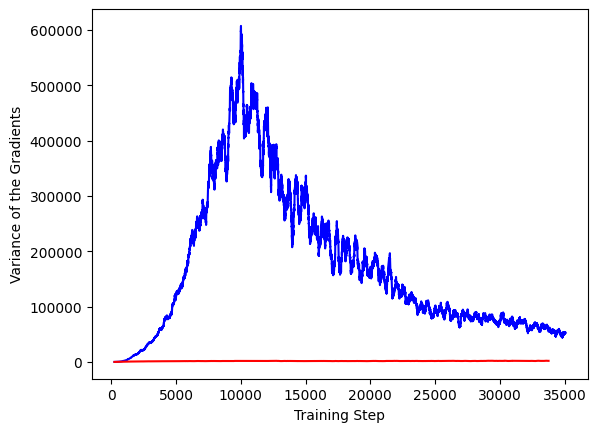

In [7]:
mean_gradients_skolik, variance_gradients_skolik = skolik_analysis.get_gradients_all_params()
mean_gradients_baseline, variance_gradients_baseline = baseline_analysis.get_gradients_all_params()

mean_gradients_skolik_smoothed = pd.Series(mean_gradients_skolik).rolling(250).mean()
mean_gradients_baseline_smoothed = pd.Series(mean_gradients_baseline).rolling(250).mean()
variance_gradients_skolik_smoothed = pd.Series(variance_gradients_skolik).rolling(250).mean()
variance_gradients_baseline_smoothed = pd.Series(variance_gradients_baseline).rolling(250).mean()


plt.plot(mean_gradients_skolik_smoothed, color='blue', linewidth=1.5, label='Data Re-Uploading')
plt.plot(mean_gradients_baseline_smoothed, color='red', linewidth=1.5, label='No Data Re-Uploading')
plt.xlabel("Training Step")
plt.ylabel("Mean Gradient Norm")
plt.show()

plt.plot(variance_gradients_skolik_smoothed, color='blue', linewidth=1.5, label='Data Re-Uploading')
plt.plot(variance_gradients_baseline_smoothed, color='red', linewidth=1.5, label='No Data Re-Uploading')
plt.xlabel("Training Step")
plt.ylabel("Variance of the Gradients")
plt.show()


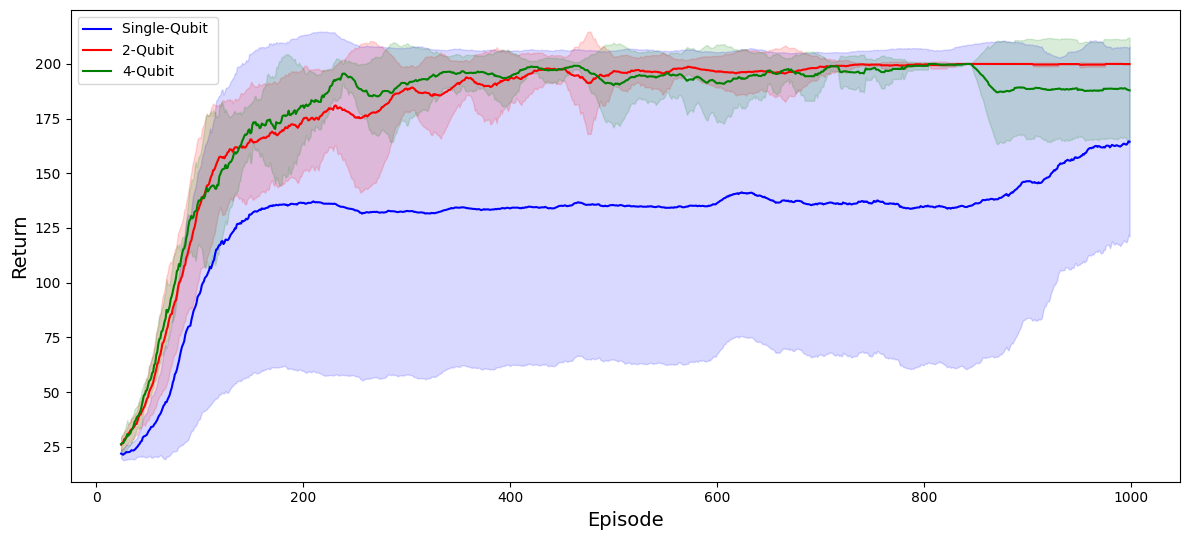

In [8]:
# calculate the mean and standard deviation of the moving averages for each agent
means_single_qubit = np.mean(uqc_1_qubit_moving_average, axis=0)
stds_single_qubit = np.std(uqc_1_qubit_moving_average, axis=0)
means_2qubits = np.mean(uqc_2_qubit_moving_average, axis=0)
stds_2qubits = np.std(uqc_2_qubit_moving_average, axis=0)
means_4qubits = np.mean(uqc_4_qubit_moving_average, axis=0)
stds_4qubits = np.std(uqc_4_qubit_moving_average, axis=0)



# plot the mean of the moving averages for each agent with different colors
fig, axs = plt.subplots(1, 1, tight_layout = True, figsize=(12, 5.5), sharey = True)
axs.plot(means_single_qubit, color='blue', linewidth=1.5, label='Single-Qubit ')
axs.plot(means_2qubits, color='red', linewidth=1.5, label='2-Qubit')
axs.plot(means_4qubits, color='green', linewidth=1.5, label='4-Qubit')


# add shaded regions for the standard deviation of the moving averages
axs.fill_between(range(len(means_single_qubit)), means_single_qubit-stds_single_qubit, means_single_qubit+stds_single_qubit, color='blue', alpha=0.15)
axs.fill_between(range(len(means_2qubits)), means_2qubits-stds_2qubits, means_2qubits+stds_2qubits, color='red', alpha=0.15)
axs.fill_between(range(len(means_4qubits)), means_4qubits-stds_4qubits, means_4qubits+stds_4qubits, color='green', alpha=0.15)

# add labels and title
axs.set_xlabel('Episode', fontsize=14)
axs.set_ylabel('Return', fontsize=14)
axs.legend()

# show the plot
plt.show()

# 3) Analysis of the previously obtained models that still made sense

In [2]:
baseline_skolik = "../../results/continuous/skolik_arch/baseline/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper_mse"
schuld_skolik = "../../results/continuous/skolik_arch/schuld_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper_mse"
uqc_1qubit = "../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/skolik_actual_optimal_hyper_mse"
uqc_2qubits = "../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/multi_qubit_full_encoding_final/2qubits_5layers"
uqc_4qubits = "../../results/continuous/uqc/globalskolik_outscaling/XZ_obs/multi_qubit_full_encoding_final/4qubits_5layers"

In [3]:
baseline_skolik_analysis = Analysis(baseline_skolik)
schuld_skolik_analysis = Analysis(schuld_skolik)
uqc_1qubit_analysis = Analysis(uqc_1qubit)
uqc_2qubits_analysis = Analysis(uqc_2qubits)
uqc_4qubits_analysis = Analysis(uqc_4qubits)

In [13]:
uqc_1_qubit_moving_average = uqc_1qubit_analysis.get_moving_average(25)
uqc_1_qubit_moving_average = [sublist for sublist in uqc_1_qubit_moving_average if len(sublist)!=200]
uqc_1_qubit_moving_average.pop(1)
uqc_2_qubit_moving_average = uqc_2qubits_analysis.get_moving_average(25)
uqc_4_qubit_moving_average = uqc_4qubits_analysis.get_moving_average(25)
skolik_moving_average = schuld_skolik_analysis.get_moving_average(25)
baseline_moving_average = baseline_skolik_analysis.get_moving_average(25)

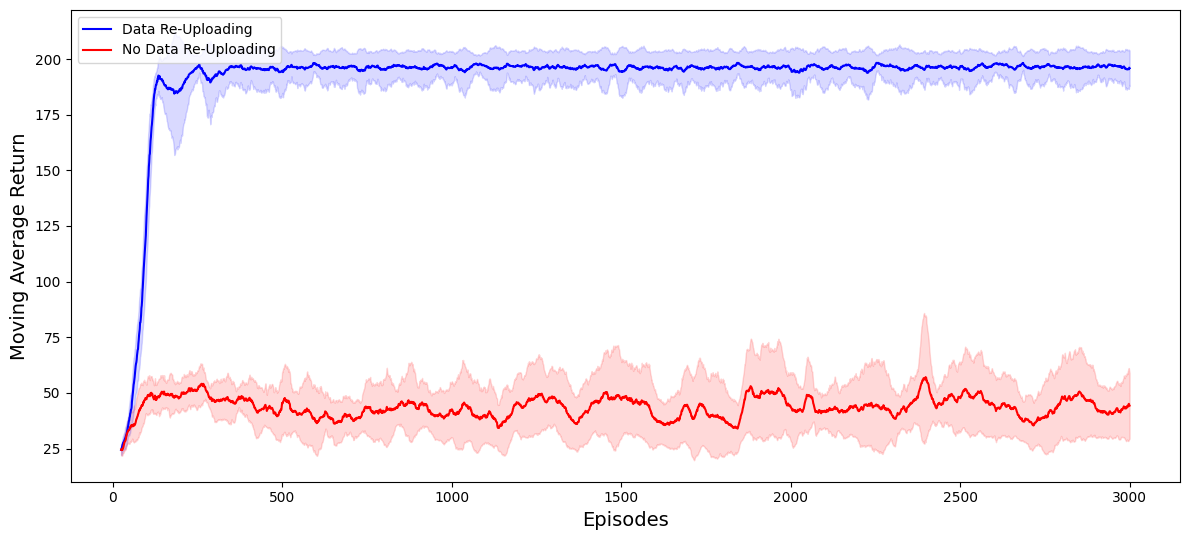

In [14]:
means_skolik = np.mean(skolik_moving_average, axis=0)
stds_skolik = np.std(skolik_moving_average, axis=0)
means_baseline = np.mean(baseline_moving_average, axis=0)
stds_baseline = np.std(baseline_moving_average, axis=0)

fig, axs = plt.subplots(1, 1, tight_layout = True, figsize=(12, 5.5), sharey = True)
axs.plot(means_skolik, color='blue', linewidth=1.5, label='Data Re-Uploading')
axs.plot(means_baseline, color='red', linewidth=1.5, label='No Data Re-Uploading')

axs.fill_between(range(len(means_skolik)), means_skolik-stds_skolik, means_skolik+stds_skolik, color='blue', alpha=0.15)
axs.fill_between(range(len(means_baseline)), means_baseline-stds_baseline, means_baseline+stds_baseline, color='red', alpha=0.15)

axs.set_xlabel('Episodes', fontsize=14)
axs.set_ylabel('Moving Average Return', fontsize=14)
axs.legend()

plt.show()


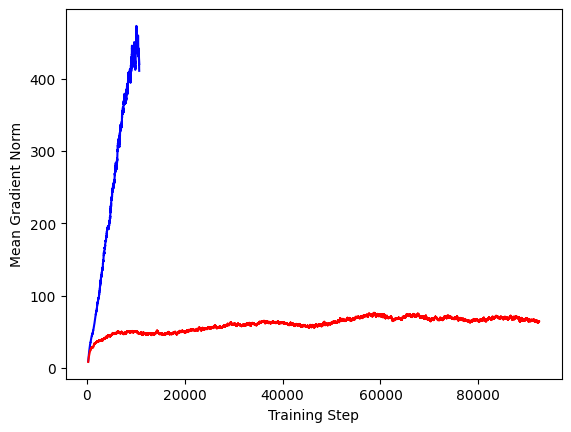

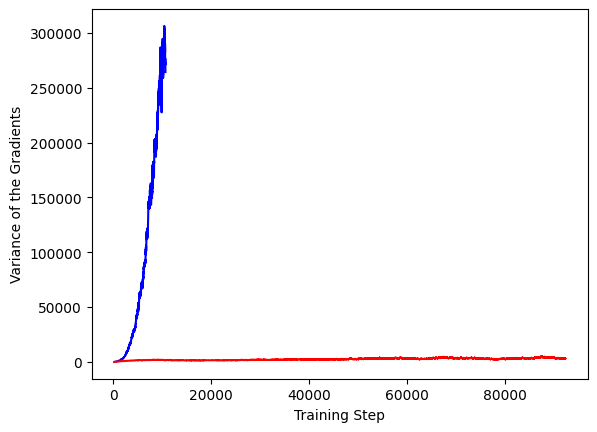

In [15]:
mean_gradients_skolik, variance_gradients_skolik = schuld_skolik_analysis.get_gradients_all_params()
mean_gradients_baseline, variance_gradients_baseline = baseline_skolik_analysis.get_gradients_all_params()

mean_gradients_skolik_smoothed = pd.Series(mean_gradients_skolik).rolling(250).mean()
mean_gradients_baseline_smoothed = pd.Series(mean_gradients_baseline).rolling(250).mean()
variance_gradients_skolik_smoothed = pd.Series(variance_gradients_skolik).rolling(250).mean()
variance_gradients_baseline_smoothed = pd.Series(variance_gradients_baseline).rolling(250).mean()


plt.plot(mean_gradients_skolik_smoothed, color='blue', linewidth=1.5, label='Data Re-Uploading')
plt.plot(mean_gradients_baseline_smoothed, color='red', linewidth=1.5, label='No Data Re-Uploading')
plt.xlabel("Training Step")
plt.ylabel("Mean Gradient Norm")
plt.show()

plt.plot(variance_gradients_skolik_smoothed, color='blue', linewidth=1.5, label='Data Re-Uploading')
plt.plot(variance_gradients_baseline_smoothed, color='red', linewidth=1.5, label='No Data Re-Uploading')
plt.xlabel("Training Step")
plt.ylabel("Variance of the Gradients")
plt.show()


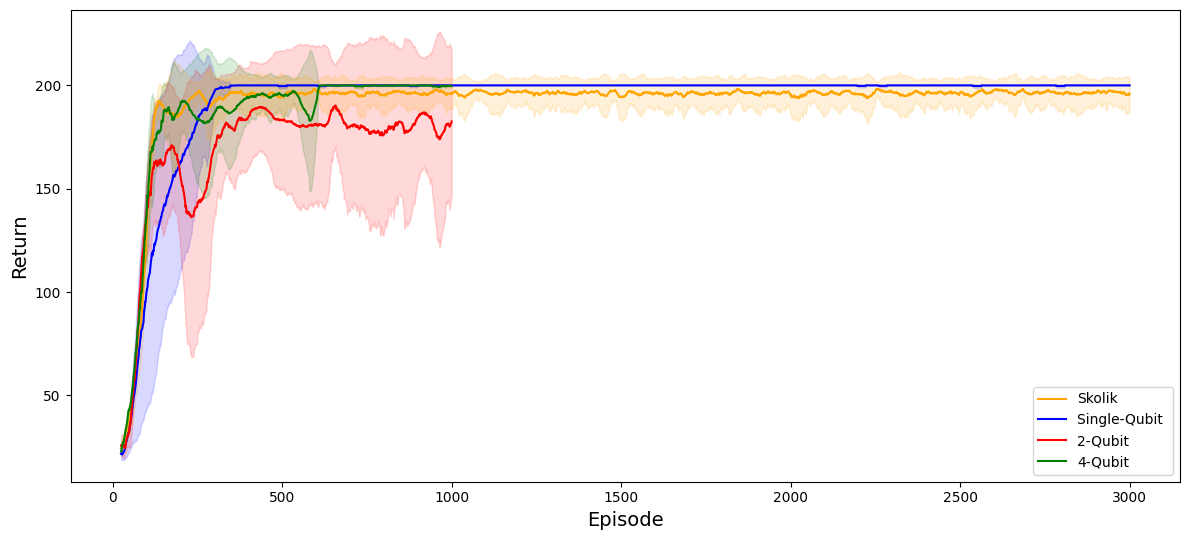

In [17]:
# calculate the mean and standard deviation of the moving averages for each agent
means_single_qubit = np.mean(uqc_1_qubit_moving_average, axis=0)
stds_single_qubit = np.std(uqc_1_qubit_moving_average, axis=0)
means_2qubits = np.mean(uqc_2_qubit_moving_average, axis=0)
stds_2qubits = np.std(uqc_2_qubit_moving_average, axis=0)
means_4qubits = np.mean(uqc_4_qubit_moving_average, axis=0)
stds_4qubits = np.std(uqc_4_qubit_moving_average, axis=0)



# plot the mean of the moving averages for each agent with different colors
fig, axs = plt.subplots(1, 1, tight_layout = True, figsize=(12, 5.5), sharey = True)
axs.plot(means_skolik, color='orange', linewidth=1.5, label='Skolik')
axs.plot(means_single_qubit, color='blue', linewidth=1.5, label='Single-Qubit ')
axs.plot(means_2qubits, color='red', linewidth=1.5, label='2-Qubit')
axs.plot(means_4qubits, color='green', linewidth=1.5, label='4-Qubit')


# add shaded regions for the standard deviation of the moving averages
axs.fill_between(range(len(means_single_qubit)), means_single_qubit-stds_single_qubit, means_single_qubit+stds_single_qubit, color='blue', alpha=0.15)
axs.fill_between(range(len(means_2qubits)), means_2qubits-stds_2qubits, means_2qubits+stds_2qubits, color='red', alpha=0.15)
axs.fill_between(range(len(means_4qubits)), means_4qubits-stds_4qubits, means_4qubits+stds_4qubits, color='green', alpha=0.15)
axs.fill_between(range(len(means_skolik)), means_skolik-stds_skolik, means_skolik+stds_skolik, color='orange', alpha=0.15)

# add labels and title
axs.set_xlabel('Episode', fontsize=14)
axs.set_ylabel('Return', fontsize=14)
axs.legend()

# show the plot
plt.show()

In [19]:
mean_gradients_single_qubit, variance_gradients_single_qubit = uqc_1qubit_analysis.get_gradients_all_params()
mean_gradients_2qubits, variance_gradients_2qubits = uqc_2qubits_analysis.get_gradients_all_params()
mean_gradients_4qubits, variance_gradients_4qubits = uqc_4qubits_analysis.get_gradients_all_params()

In [22]:
# Let's calculate a moving average of the gradients every 200 steps
mean_gradients_single_qubit_smoothed = pd.Series(mean_gradients_single_qubit).rolling(250).mean()
mean_gradients_2qubits_smoothed = pd.Series(mean_gradients_2qubits).rolling(250).mean()
mean_gradients_4qubits_smoothed = pd.Series(mean_gradients_4qubits).rolling(250).mean()
variance_gradients_single_qubit_smoothed = pd.Series(variance_gradients_single_qubit).rolling(250).mean()
variance_gradients_2qubits_smoothed = pd.Series(variance_gradients_2qubits).rolling(250).mean()
variance_gradients_4qubits_smoothed = pd.Series(variance_gradients_4qubits).rolling(250).mean()

In [1]:
plt.plot(mean_gradients_single_qubit_smoothed, color='blue', linewidth=1.5, label='Single-Qubit 5 layers')
plt.plot(mean_gradients_2qubits_smoothed, color='red', linewidth=1.5, label='2-Qubit 5 layers')
plt.plot(mean_gradients_4qubits_smoothed, color='green', linewidth=1.5, label='4-Qubit 5 layers')
plt.xlabel('Training Step', fontsize=12)
plt.ylabel('Mean Gradient Norm', fontsize=12)
plt.legend()
plt.show()

fig = plt.gcf()
print(fig.get_size_inches())

plt.plot(variance_gradients_single_qubit_smoothed, color='blue', linewidth=1.5, label='Single-Qubit 5 layers')
plt.plot(variance_gradients_2qubits_smoothed, color='red', linewidth=1.5, label='2-Qubit 5 layers')
plt.plot(variance_gradients_4qubits_smoothed, color='green', linewidth=1.5, label='4-Qubit 5 layers')
plt.xlabel('Training Step', fontsize=12)
plt.ylabel('Variance of the Gradients', fontsize=12)
plt.legend()

NameError: name 'plt' is not defined